只要导入了画图的函数，只用一行代码就可以创建一个简易的频次直方图

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

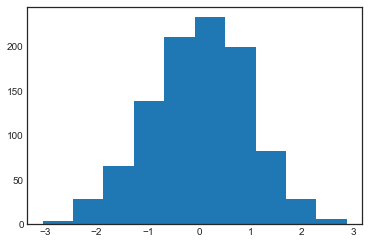

In [2]:
plt.hist(data);

hist() 有许多用来调整计算过程和显示效果的选项，下面是一个更加个性化的频次直方图。

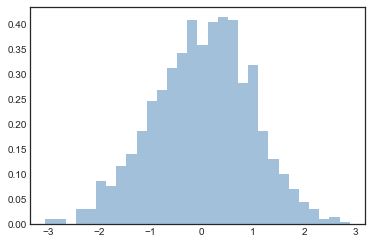

In [3]:
 plt.hist(data, bins=30, density=True, alpha=0.5, 
          histtype='stepfilled', color='steelblue',edgecolor='none');

在用频次直方图对不同分布特征的样本进行对比时，将 histtype='stepfilled' 与透明性设置参数 alpha 搭配使用的效果非常好

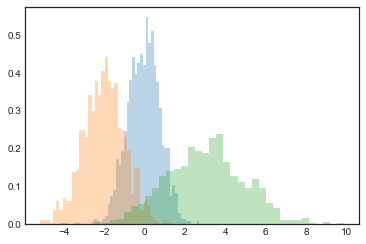

In [4]:
x1 = np.random.normal(0, 0.8, 1000) 
x2 = np.random.normal(-2, 1, 1000) 
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled',alpha=0.3,density=True,bins=40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs);

简单地计算频次直方图（就是计算每段区间的样本数），而并不想画图显示它们，那么可以直接用 np.histogram()

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
counts

array([ 33, 205, 444, 283,  35], dtype=int64)

# 二维频次直方图与数据区间划分
    就像将一维数组分为区间创建一维频次直方图一样，我们也可以将二维数组按照二维区间进行切分，来创建二维频次直方图。

简单介绍几种创建二维频次直方图的方法：用一个多元高斯分布生成 x 轴与 y 轴的样本数据。

In [6]:
mean = [0,0]
cov =[[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,10000).T

01-plt.hist2d：二维频次直方图
    
    画二维频次直方图最简单的方法就是使用 Matplotlib 的 plt.hist2d 函数。

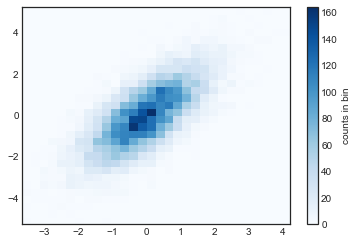

In [7]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

与 plt.hist 函数一样，plt.hist2d 也有许多调整图形与区间划分的配置选项，详细内容都在程序文档中。

像 plt.hist 有一个只计算结果不画图的 np.histogram 函数一样，plt.hist2d 类似的函数是 np.histogram2d。

In [8]:
counts, xedges, yedges = np.histogram2d(x,y,bins=30)

02-plt.hexbin：六边形区间划分

    二维频次直方图是由与坐标轴正交的方块分割而成的，还有一种常用的方式是用正六边形分割。
    Matplotlib 提供了 plt.hexbin 满足此类需求，将二维数据集分割成蜂窝状。

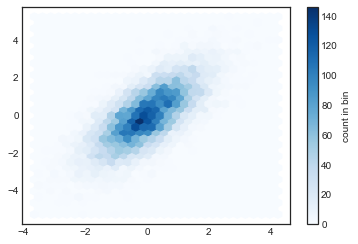

In [9]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

plt.hexbin 同样也有一大堆有趣的配置选项，包括为每个数据点设置不同的权重，以及用任意 NumPy 累计函数改变每个六边形区间划分的结果（权重均值、标准差等指标）。

03-核密度估计（详见5.13）

    还有一种评估多维数据分布密度的常用方法是核密度估计（kernel density estimation，KDE）。
    简单演示如何用 KDE 方法“抹掉”空间中离散的数据点，从而拟合出一个平滑的函数。
    在 scipy.stats 程序包里面有一个简单快速的 KDE 实现方法

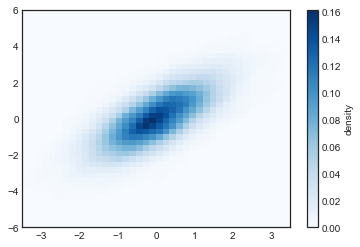

In [10]:
from scipy.stats import gaussian_kde 

# 拟合数组维度[Ndim, Nsamples] 
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 用一对规则的网格数据进行拟合 
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)

Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 画出结果图 
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE 方法通过不同的平滑带宽长度（smoothing length）在拟合函数的准确性与平滑性之间作出权衡（无处不在的偏差与方差的取舍问题的一个例子）。想找到恰当的平滑带宽长度是件很困难的事，gaussian_kde 通过一种经验方法试图找到输入数据平滑长度的近似最优解。